In [1]:
class stack:
    
    # Инициализация
    def __init__(self):
        self.items = []

    #Проверка на пустоту
    def is_empty(self):
        return len(self.items) == 0
        
    # Добавление элемента с конца
    def add(self, element):
        return self.items.append(element)

    # Извлечение элемента с конца
    def pop(self):
        if not self.is_empty():
            return self.items.pop()
        else:
           # print('Стэк пустой')
            pass
            
    # Просмотр элемента с конца
    def peek(self):
        if not self.is_empty():
            return self.items[-1]
        else:
            # print('Cтэк пустой')
            pass

In [2]:
class deque:
    
    # Инициализация
    def __init__(self):
        self.items = []
        
    # Проверка на пустоту
    def is_empty(self):
        return len(self.items) == 0

    # Добавление элмента слева
    def add_left(self, element):
        self.items.insert(0, element)

    # Добавление элемента справа
    def add_right(self, element):
        self.items.append(element)

    # Извлечение элемента слева
    def pop_left(self):
        if not self.is_empty():
            return self.items.pop(0)
        else:
            print('Дэк пустой')

    # Извелечение элемента справа
    def pop_right(self):
        if not self.empty():
            return self.items.pop()
        else:
            print('Дэк пустой')

    # Просмотр элемента справа
    def peek_right(self):
        if not self.is_empty():
            return self.items[-1]
        else:
            print('Дэк пустой')

    # Просмотр элмента слева
    def peek_left(self):
        if not self.is_empty():
            return self.items[0]
        else:
            print('Дэк пустой')

In [3]:
def bin_search(arr, target):
    i = 0
    j = len(arr)-1
    while i <= j:
        k = (j+i)//2
        if arr[k] < target:
            i = k + 1
        elif arr[k] > target:
            j = k - 1
        else:
            return k
    return -1

In [4]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[len(arr)//2]
        left = [x for x in arr if x < pivot]
        mid = [x for x in arr if x == pivot]
        right = [x for x in arr if x > pivot]
    return quick_sort(left) + mid + quick_sort(right)

In [5]:
# Класс хэш-таблицы 
class HashTable:
    
    # Инициализация
    def __init__(self, size):
        self.size = size
        self.table = [None] * size
        self.rand_nums = rand.sample(range(self.size), self.size)
        
    # Хэш функция
    def hash_function(self, key):
        return sum(ord(char) for char in key) % self.size

    # Вставка в хэш таблицу
    def insert(self, key, value):
        index = self.hash_function(key) 
        # Метод рехэширования в случае коллизии
        while self.table[index] is not None:
            # Простое рехэширование
            index = (index + 1) % self.size
        
        self.table[index] = [key, value]
        
    # Поиск по таблице
    def search(self, key):
        index = self.hash_function(key)
        # Если занято, то рехэшируем ключи
        while self.table[index] is not None:
            if self.table[index][0] == key:
                # Нашли
                return self.table[index][1] 
            # Не нашли
            index = (index + 1) % self.size
                

    # Удаление
    def delete(self, key):
        index = self.hash_function(key)
        while self.table[index] is not None:
            if self.table[index][0] == key:
                self.table[index][1] = None
            index = (index + 1) % self.size

In [6]:
#!pip install pandas

In [7]:
import pandas as pd

In [8]:
table = pd.read_csv('report.csv')

In [9]:
table.head()

,номер заказа,дата заказа,название товара,категория товара,количество продаж,цена за единицу,общая стоимость
0,1,2024-05-13,Молоко,Молочные продукты,543,2.5,1357.5
1,2,2024-05-13,Хлеб,Хлебобулочные изделия,189,1.2,226.8
2,3,2024-05-14,Яйца,Молочные продукты,749,0.3,224.7
3,4,2024-05-14,Масло,Молочные продукты,238,3.0,714.0
4,5,2024-05-15,Сахар,Бакалея,474,1.0,474.0


In [10]:
# Проверим ошибки ввода. То есть значения в таблице

# Пропусков нет
table.isna().sum()

номер заказа         0
дата заказа          0
название товара      0
категория товара     0
количество продаж    0
цена за единицу      0
общая стоимость      0
dtype: int64

In [11]:
# С категориями все в порядке
table['категория товара'].unique()

array(['Молочные продукты', 'Хлебобулочные изделия', 'Бакалея', 'Овощи',
       'Мясные продукты', 'Фрукты', 'Морепродукты',
       'Кондитерские изделия', 'Напитки', 'Крупы',
       'Замороженные продукты', 'Консервы', 'Фаршированные продукты',
       'Мороженое'], dtype=object)

In [12]:
# С товарами все в порядке
table['название товара'].nunique()

100

In [13]:
# Ошибок нет и не могло быть, так что обработка не требуется

In [14]:
# Проверка на наличие номера заказа с помощью алгоритма бинарного поиска
print(bin_search(table['номер заказа'], 1231))

-1


In [15]:
k = bin_search(table['номер заказа'], 69)
print(table.iloc[k])

номер заказа                 69
дата заказа          2024-06-16
название товара          Патока
категория товара        Бакалея
количество продаж           360
цена за единицу             4.0
общая стоимость          1440.0
Name: 68, dtype: object


In [16]:
total_sum = table['общая стоимость'].sum()

In [36]:
# Общая выручка магазина
print(f'Общая выручка магазина составила {total_sum} руб.')

Общая выручка магазина составила 112855.1 руб.


In [18]:
# Поиск товара, проданного больше всего раз с помощью стэка
amount = table[['название товара', 'количество продаж']]
s = stack()
s.add(amount.iloc[0])

for i in range(len(amount)):
    if s.peek()['количество продаж'] < amount['количество продаж'][i]:
        s.add(amount.iloc[i])
        
print(s.peek())

название товара      Мороженая кукуруза
количество продаж                   999
Name: 86, dtype: object


In [19]:
# Поиск товара, который принес наибольшую выручку с помощью дэка
amount = table[['название товара', 'общая стоимость']]
d = deque()
d.add_right(amount.iloc[0])

for i in range(len(amount)):
    if d.peek_right()['общая стоимость'] < amount['общая стоимость'][i]:
        d.add_right(amount.iloc[i])
        
print(d.peek_right())

название товара    Красная рыба
общая стоимость          8100.0
Name: 42, dtype: object


In [20]:
table['доля в выручке в %'] = table['общая стоимость'] * 100 / total_sum

In [21]:
# Количество единиц каждого проданного товара и доля в выручке
table[['название товара', 'количество продаж', 'доля в выручке в %']]

,название товара,количество продаж,доля в выручке в %
0,Молоко,543,1.202870
1,Хлеб,189,0.200966
2,Яйца,749,0.199105
3,Масло,238,0.632670
4,Сахар,474,0.420008
...,...,...,...
95,Какао,110,0.243675
96,Пиво,652,0.866598
97,Говядина,845,5.241234
98,Помидорная паста,142,0.251650


In [22]:
# Проверим на ошибки в выводе доли в выручке
table['доля в выручке в %'].sum()

100.0

In [23]:
# Погрешность из-за больших дробных частей, а так все верно

In [24]:
import random as rand

In [25]:
# Используем хэш-таблицы для агрегирования выручки по категориям
ht = HashTable(table['категория товара'].nunique())

In [26]:
for category in table['категория товара'].unique():
    ht.insert(category, table[table['категория товара'] == category]['общая стоимость'].sum())

In [27]:
ht.search('Бакалея')

9233.8

In [28]:
part = table[['название товара', 'доля в выручке в %']]

In [29]:
part = part.values.tolist()

In [30]:
# Сортировка по алфавиту по алгоритму быстрой сортировки
part = quick_sort(part)

In [31]:
part

[['Апельсины', 0.07124179589579913],
 ['Арахис', 0.8665979650011386],
 ['Бананы', 0.773558306181998],
 ['Бекон', 2.30428221675405],
 ['Бефстроганов', 1.3867339623995725],
 ['Брынза', 1.1058428019646431],
 ['Брынза сырая', 0.5086168015446355],
 ['Вино', 6.3089749599264895],
 ['Виноград', 0.48380622585953137],
 ['Вода', 0.310575242058179],
 ['Газировка', 1.277301601788488],
 ['Говядина', 5.2412341134782565],
 ['Гранат', 0.5529214009823216],
 ['Гречка', 0.04253241546017858],
 ['Грибы', 0.03615255314115179],
 ['Груши', 1.0271578333633127],
 ['Йогурт', 0.5874789885437166],
 ['Кабачки', 0.5377692279746329],
 ['Какао', 0.24367529690727313],
 ['Капуста', 0.06982404871379318],
 ['Капуста белокочанная', 0.0434185074489323],
 ['Капуста квашеная', 1.4886345411062503],
 ['Карась', 4.790213291202613],
 ['Картофель', 0.27513156250803017],
 ['Каша овсяная', 0.18085137490463435],
 ['Кефаль', 2.9019512631684345],
 ['Кефир', 1.0845765942345538],
 ['Кисломолочный напиток', 1.238756600277701],
 ['Колбаса',

In [32]:
part = table[['название товара', 'доля в выручке в %']]
part = part.sort_values(by='доля в выручке в %', ascending=False).head(10)
part

,название товара,доля в выручке в %
42,Красная рыба,7.177345
24,Вино,6.308975
97,Говядина,5.241234
90,Карась,4.790213
17,Курица,4.129189
92,Хек,3.296262
25,Кефаль,2.901951
86,Мороженая кукуруза,2.655618
66,Бекон,2.304282
50,Лосось,2.250674


In [33]:
#!pip install matplotlib

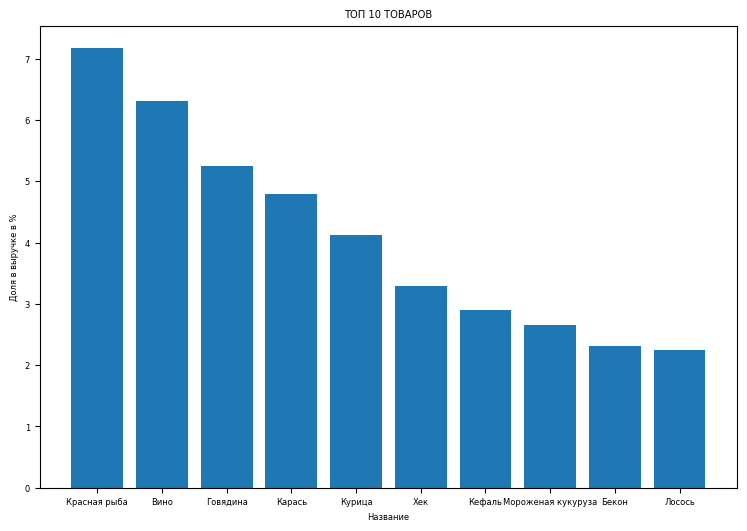

In [46]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(9, 6)
plt.rcParams.update({'font.size': 6})
plt.bar(part['название товара'], part['доля в выручке в %'])
plt.title('ТОП 10 ТОВАРОВ')
plt.xlabel('Название')
plt.ylabel('Доля в выручке в %')
plt.show()

### Таким образом, вы выполнили все задания, использовав такие структуры данных как массив, стэк, дэк, хэш таблица, а также такие алгоритмы как быстрая сортировка, бинарный поискь